<a href="https://colab.research.google.com/github/GiangAnhTuan-20146450/Bai-Tap-AI/blob/main/Nhandienmonan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
folder = '/content/drive/MyDrive/Anhmonan/'
from keras.models import load_model

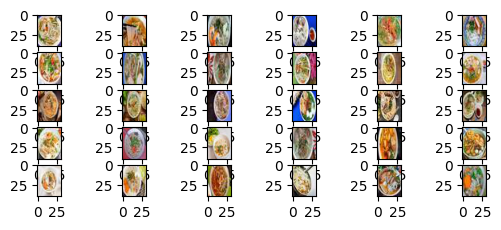

In [ ]:
for i in range(30):
  plt.subplot(10,6,i+1)
  filename=folder+'/banhcanh ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

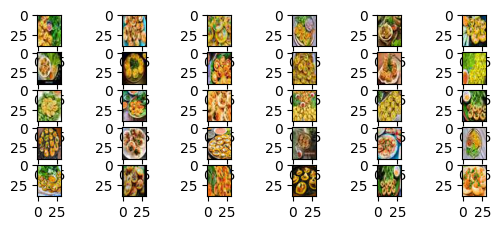

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Anhmonan/'
for i in range(30):
  plt.subplot(10,6,i+1)
  filename=folder+'/banhkhot ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

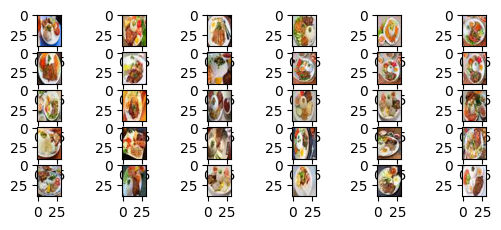

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Anhmonan/'
for i in range(30):
  plt.subplot(10,6,i+1)
  filename=folder+'/comtam ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

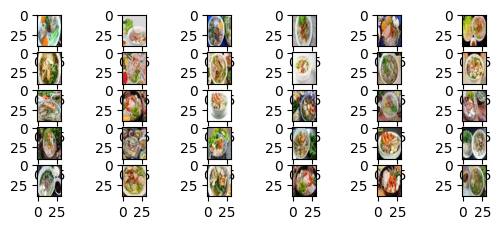

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Anhmonan/'
for i in range(30):
  plt.subplot(10,6,i+1)
  filename=folder+'/hutieu ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

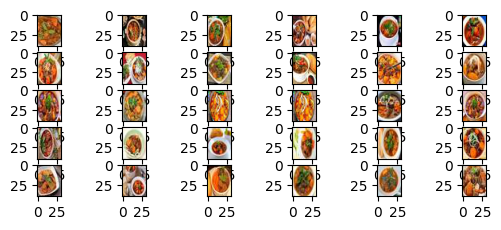

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Anhmonan/'
for i in range(30):
  plt.subplot(10,6,i+1)
  filename=folder+'/bokho ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

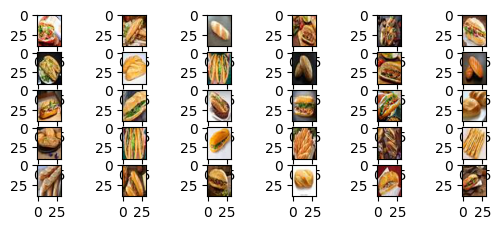

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Anhmonan/'
for i in range(30):
  plt.subplot(10,6,i+1)
  filename=folder+'/banhmi ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

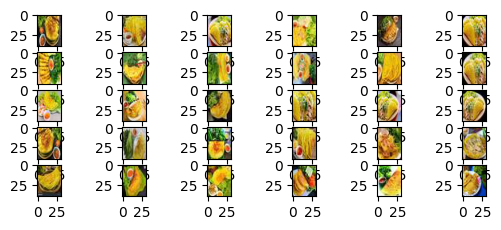

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Anhmonan/'
for i in range(30):
  plt.subplot(10,6,i+1)
  filename=folder+'/banhxeo ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

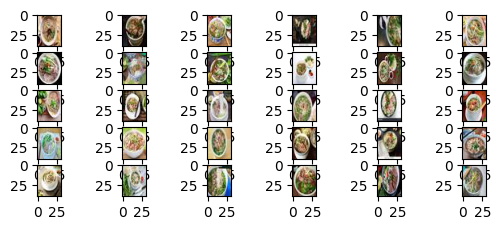

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Anhmonan/'
for i in range(30):
  plt.subplot(10,6,i+1)
  filename=folder+'/pho ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

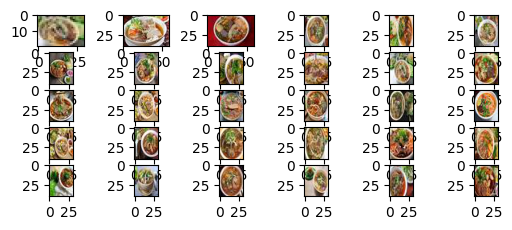

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Anhmonan/'
for i in range(30):
  plt.subplot(10,6,i+1)
  filename=folder+'/bunbo ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

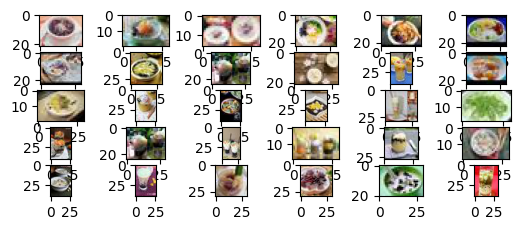

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder = '/content/drive/MyDrive/Anhmonan/'
for i in range(30):
  plt.subplot(10,6,i+1)
  filename=folder+'/che ('+str(i+1)+').jpg'
  img=imread(filename)
  plt.imshow(img)
plt.imshow(img)

In [ ]:
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/Anhmonan/'
photos, labels = list(),list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('banhcanh'):
    output = 1
  if file.startswith('banhkhot'):
    output = 2
  if file.startswith('comtam'):
    output = 3
  if file.startswith('hutieu'):
    output = 4
  if file.startswith('bokho'):
    output = 5
  if file.startswith('banhmi'):
    output = 6
  if file.startswith('banhxeo'):
    output = 7
  if file.startswith('pho'):
    output = 8
  if file.startswith('bunbo'):
    output = 9
  if file.startswith('che'):
    output = 10
  img =load_img(folder+ file,target_size=(30,40))
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('food_photos.npy',photos)
save('food_labels.npy',labels)

(300, 30, 40, 3) (300,)


In [ ]:
import numpy as np
x_train = np.load('/content/food_photos.npy')
y_train = np.load('/content/food_labels.npy')
print(x_train.shape)
print(y_train.shape)
x=x_train
y=y_train

(300, 30, 40, 3)
(300,)


In [ ]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,100)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(30,40,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(100,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=64,epochs = 200,verbose = 1)

model.save('Anh mon an.h5')

from keras.models import load_model
model5=load_model('Anh mon an.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 20, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 10, 64)        0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 8, 10, 64)        

1/1 [==============================] - 0s 229ms/step


'BÁNH CANH'

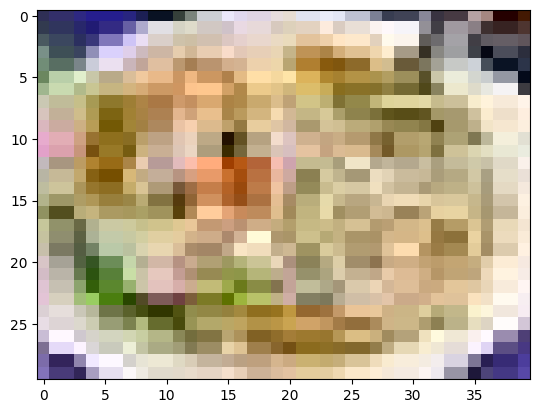

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'BÁNH CANH',2:'BÁNH KHỌT', 3:'CƠM TẤM', 4:'HỦ TIẾU',5:'BÒ KHO', 6:'BÁNH MÌ',7:'BÁNH XÈO', 8:'PHỞ',9:'BÚN BÒ',10:'CHÈ'}
img = load_img("/content/drive/MyDrive/Anhdetest/Monan/banhcanh.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 17ms/step


'BÁNH MÌ'

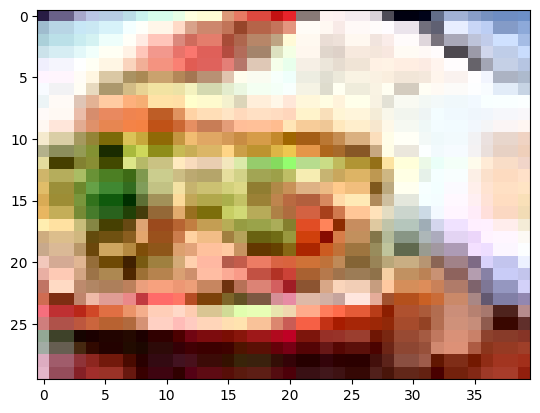

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'BÁNH CANH',2:'BÁNH KHỌT', 3:'CƠM TẤM', 4:'HỦ TIẾU',5:'BÒ KHO', 6:'BÁNH MÌ',7:'BÁNH XÈO', 8:'PHỞ',9:'BÚN BÒ',10:'CHÈ'}
img = load_img("/content/drive/MyDrive/Anhdetest/Monan/banhmi.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 27ms/step


'BÁNH KHỌT'

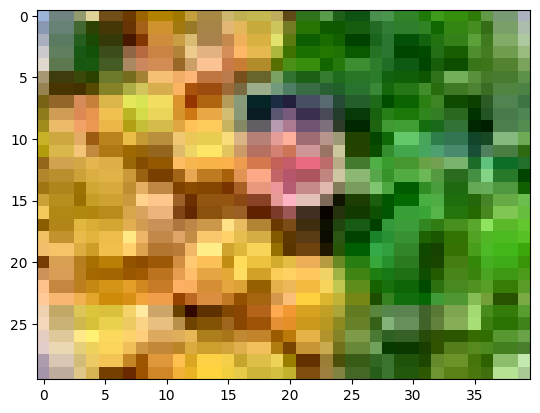

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'BÁNH CANH',2:'BÁNH KHỌT', 3:'CƠM TẤM', 4:'HỦ TIẾU',5:'BÒ KHO', 6:'BÁNH MÌ',7:'BÁNH XÈO', 8:'PHỞ',9:'BÚN BÒ',10:'CHÈ'}
img = load_img("/content/drive/MyDrive/Anhdetest/Monan/banhkhot.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 18ms/step


'BÁNH XÈO'

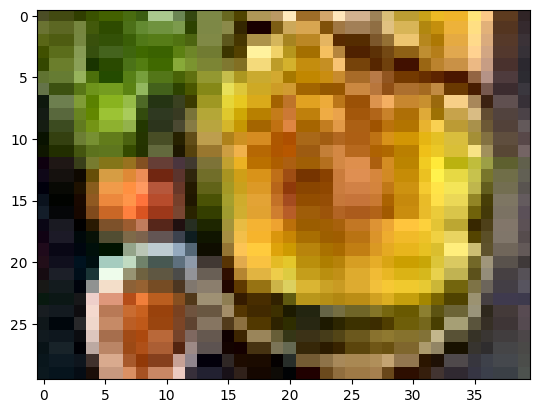

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'BÁNH CANH',2:'BÁNH KHỌT', 3:'CƠM TẤM', 4:'HỦ TIẾU',5:'BÒ KHO', 6:'BÁNH MÌ',7:'BÁNH XÈO', 8:'PHỞ',9:'BÚN BÒ',10:'CHÈ'}
img = load_img("/content/drive/MyDrive/Anhdetest/Monan/banhxeo.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 20ms/step


'BÒ KHO'

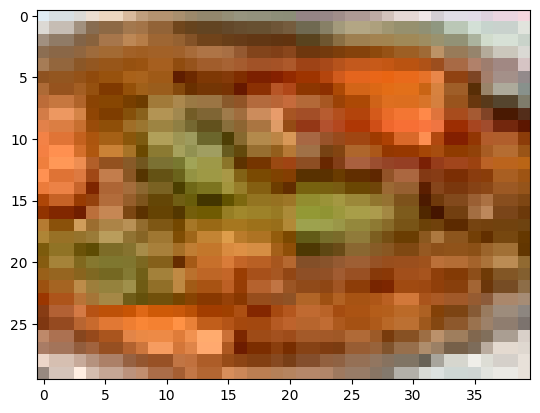

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'BÁNH CANH',2:'BÁNH KHỌT', 3:'CƠM TẤM', 4:'HỦ TIẾU',5:'BÒ KHO', 6:'BÁNH MÌ',7:'BÁNH XÈO', 8:'PHỞ',9:'BÚN BÒ',10:'CHÈ'}
img = load_img("/content/drive/MyDrive/Anhdetest/Monan/bokho.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 19ms/step


'BÚN BÒ'

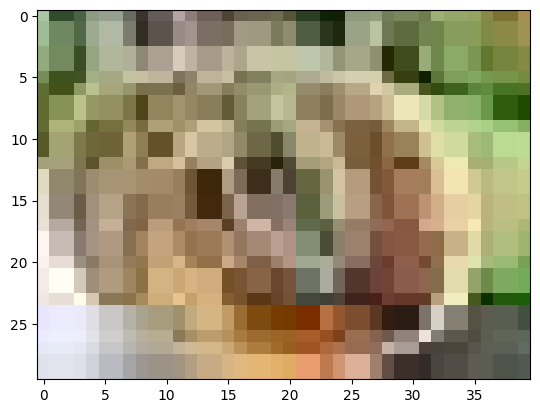

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'BÁNH CANH',2:'BÁNH KHỌT', 3:'CƠM TẤM', 4:'HỦ TIẾU',5:'BÒ KHO', 6:'BÁNH MÌ',7:'BÁNH XÈO', 8:'PHỞ',9:'BÚN BÒ',10:'CHÈ'}
img = load_img("/content/drive/MyDrive/Anhdetest/Monan/bunbo.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 20ms/step


'CHÈ'

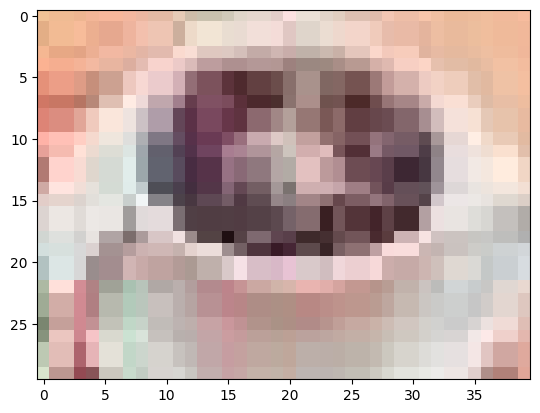

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'BÁNH CANH',2:'BÁNH KHỌT', 3:'CƠM TẤM', 4:'HỦ TIẾU',5:'BÒ KHO', 6:'BÁNH MÌ',7:'BÁNH XÈO', 8:'PHỞ',9:'BÚN BÒ',10:'CHÈ'}
img = load_img("/content/drive/MyDrive/Anhdetest/Monan/che.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 17ms/step


'CƠM TẤM'

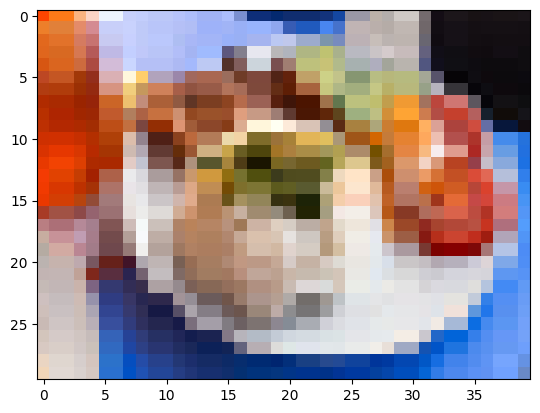

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'BÁNH CANH',2:'BÁNH KHỌT', 3:'CƠM TẤM', 4:'HỦ TIẾU',5:'BÒ KHO', 6:'BÁNH MÌ',7:'BÁNH XÈO', 8:'PHỞ',9:'BÚN BÒ',10:'CHÈ'}
img = load_img("/content/drive/MyDrive/Anhdetest/Monan/comtam.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 19ms/step


'HỦ TIẾU'

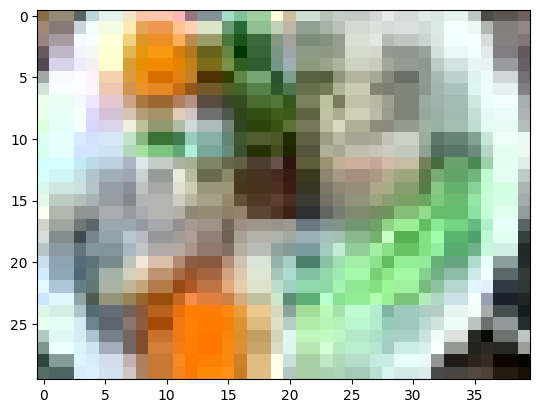

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'BÁNH CANH',2:'BÁNH KHỌT', 3:'CƠM TẤM', 4:'HỦ TIẾU',5:'BÒ KHO', 6:'BÁNH MÌ',7:'BÁNH XÈO', 8:'PHỞ',9:'BÚN BÒ',10:'CHÈ'}
img = load_img("/content/drive/MyDrive/Anhdetest/Monan/hutieu.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

1/1 [==============================] - 0s 18ms/step


'PHỞ'

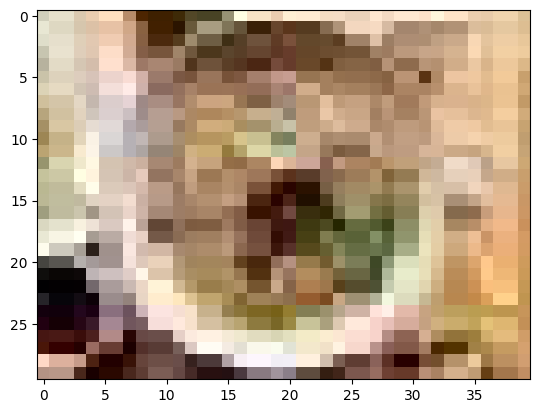

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'BÁNH CANH',2:'BÁNH KHỌT', 3:'CƠM TẤM', 4:'HỦ TIẾU',5:'BÒ KHO', 6:'BÁNH MÌ',7:'BÁNH XÈO', 8:'PHỞ',9:'BÚN BÒ',10:'CHÈ'}
img = load_img("/content/drive/MyDrive/Anhdetest/Monan/pho.jpg",target_size=(30,40))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,30,40,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]